In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import asterion as ast

ast.style.use("asterion-light")

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
import numpyro
numpyro.set_host_device_count(5)

In [3]:
filename = "/Users/alyttle/OneDrive/Data/Asterion/mesa_data.hdf5"
df = pd.read_hdf(filename)
df.head()

filename  model_number  evol_stage  initial_mass  initial_Yinit  \
0  profile4         152.0         0.0           0.8           0.32   
1  profile5         153.0         0.0           0.8           0.32   
2  profile6         154.0         0.0           0.8           0.32   
3  profile7         155.0         0.0           0.8           0.32   
4  profile8         156.0         0.0           0.8           0.32   

   initial_Zinit  initial_feh  initial_MLT  initial_fov  star_mass  ...  \
0       0.036803          0.5          2.1          0.0        0.8  ...   
1       0.036803          0.5          2.1          0.0        0.8  ...   
2       0.036803          0.5          2.1          0.0        0.8  ...   
3       0.036803          0.5          2.1          0.0        0.8  ...   
4       0.036803          0.5          2.1          0.0        0.8  ...   

     E_0_36    E_0_37    E_0_38        E_0_39        E_0_40        tau_he  \
0  0.000006  0.000002  0.000001  7.889056e-07  6.149682e-07  15247.850269   
1  0.000008  0.000002  0.000001  8.212464e-07  6.273383e-07  14809.891105   
2  0.000013  0.000003  0.000001  8.515127e-07  6.398741e-07  14496.838617   
3  0.000018  0.000003  0.000001  8.790797e-07  6.513090e-07  14220.559706   
4  0.000027  0.000003  0.000001  9.036751e-07  6.612813e-07  14054.932771   

      delta_he    amp_he        tau_cz  \
0  2037.139686  0.029961  38796.631185   
1  1980.528826  0.029540  37900.327592   
2  1940.585790  0.029221  37222.634389   
3  1878.217087  0.028561  36703.539749   
4  1883.449431  0.028860  36302.082709   

                                            dirname  
0  m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1  
1  m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1  
2  m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1  
3  m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1  
4  m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1  

[5 rows x 115 columns]

In [4]:
df["log_nu_max"] = np.log10(df["nu_max"])

In [5]:
seed = 0
random_state = np.random.RandomState(seed)

num_samples = 1000
mask = (df["star_age"] < 20) & (df["nu_max"] > 25) & (df["frac_age"] > 0.01) & (df["effective_T"] < 7000.0)

sample = df[mask].sample(
    frac=1, random_state=random_state
).sample(
    num_samples, random_state=random_state, weights="log_nu_max"
)
sample.head()

filename  model_number  evol_stage  initial_mass  initial_Yinit  \
114836   profile754         902.0         1.0           1.1           0.28   
133884   profile655         803.0         1.0           1.2           0.28   
206660  profile1207        1820.0         2.0           1.4           0.28   
16067    profile649         797.0         1.0           0.8           0.32   
13558    profile745         893.0         1.0           0.8           0.24   

        initial_Zinit  initial_feh  initial_MLT  initial_fov  star_mass  ...  \
114836       0.004097         -0.5          1.9          0.0   1.100000  ...   
133884       0.012800          0.0          2.3          0.0   1.200000  ...   
206660       0.038980          0.5          2.1          0.0   1.397725  ...   
16067        0.036803          0.5          2.3          0.0   0.800000  ...   
13558        0.004324         -0.5          2.3          0.0   0.800000  ...   

              E_0_37        E_0_38        E_0_39        E_0_40        tau_he  \
114836  6.374962e-09  6.853576e-09  7.506893e-09  8.421256e-09   1534.442438   
133884  1.126873e-08  8.445754e-09  7.669328e-09  7.605628e-09   1050.518944   
206660  1.169043e-05  8.456426e-05  2.761733e-04  2.276595e-05  62424.047782   
16067   6.137175e-09  7.764732e-09  1.086357e-08  2.252088e-08    642.068116   
13558   1.343466e-08  1.082942e-08  1.001692e-08  9.950275e-09    900.933807   

           delta_he    amp_he         tau_cz  \
114836   795.437719 -0.001379    1354.270367   
133884   170.639572  0.023891    2583.688281   
206660  9282.928284  0.061085  134563.754051   
16067     64.691967  0.006260    2128.600292   
13558     93.529779  0.005629    2448.073047   

                                                  dirname  log_nu_max  
114836   m1.1Y0.28FeH-0.5MLT1.9ov0.005000000000000001dif1    3.175834  
133884    m1.2Y0.28FeH0.0MLT2.3ov0.006444444444444444dif0    3.236161  
206660    m1.4Y0.28FeH0.5MLT2.1ov0.009333333333333329dif0    1.525270  
16067    m0.8Y0.32FeH0.5MLT2.3ov0.0006666666666666673dif1    3.581314  
13558   m0.8Y0.24FeH-0.5MLT2.3ov0.0006666666666666673dif1    3.408074  

[5 rows x 116 columns]

In [6]:
sample["log_luminosity"] = np.log10(sample["luminosity"])

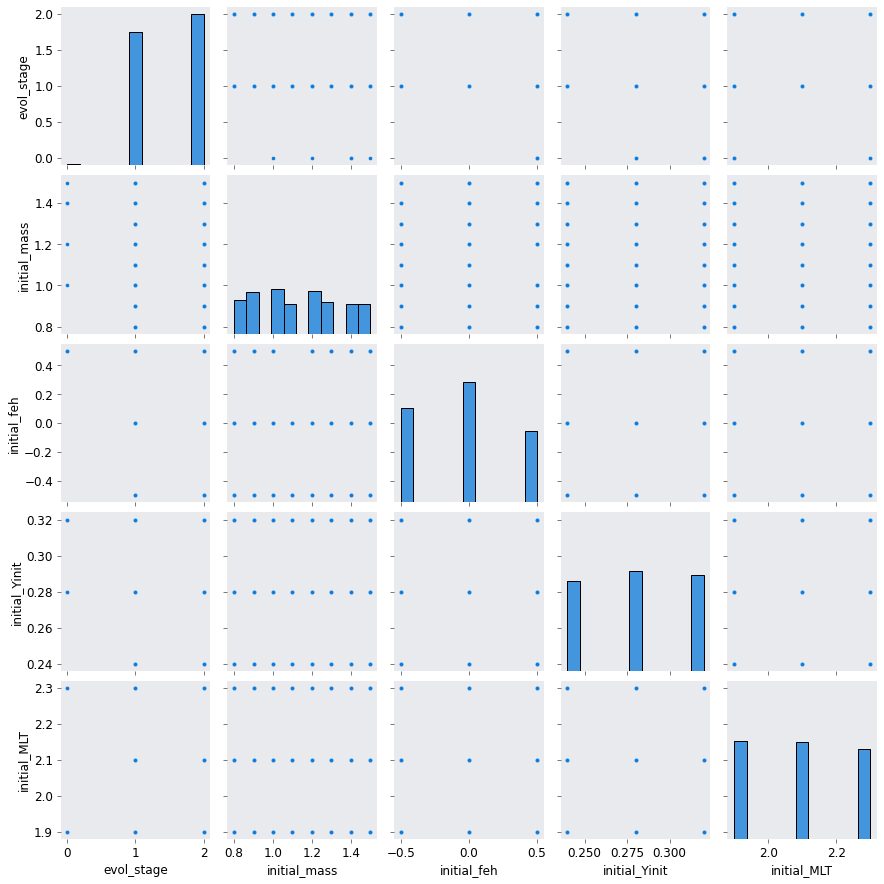

In [7]:
sns.pairplot(
    sample, 
    vars=[
        "evol_stage",
        "initial_mass", 
        "initial_feh", 
        "initial_Yinit", 
        "initial_MLT"
    ]
);

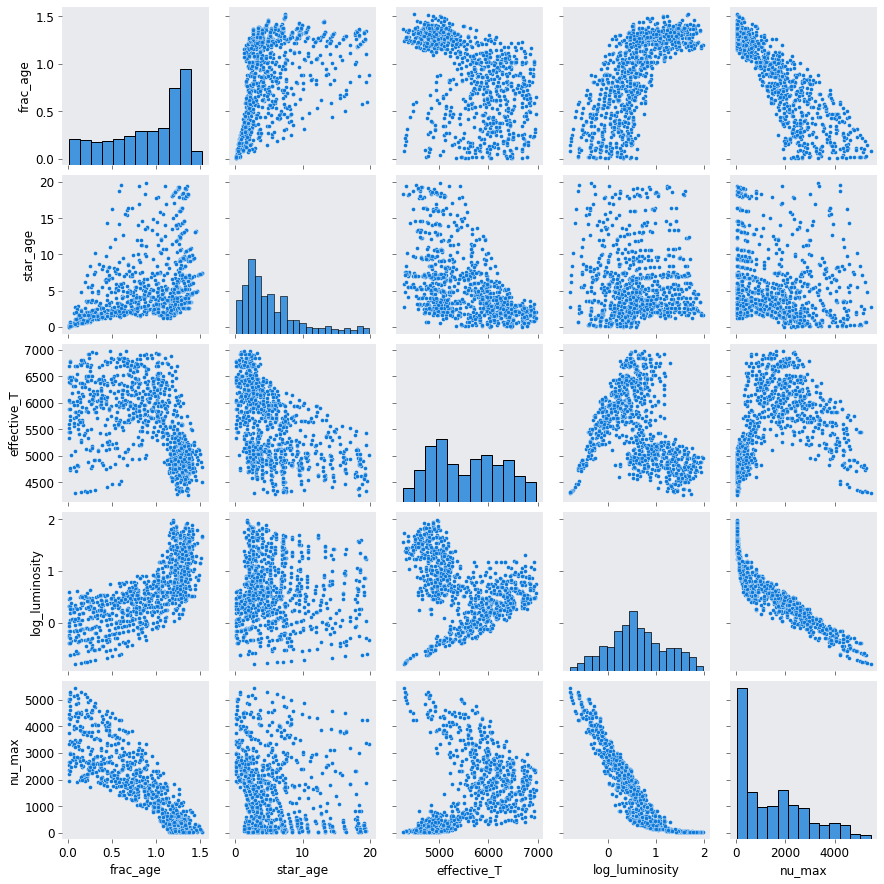

In [19]:
sns.pairplot(
    sample, 
    vars=[
        "frac_age", 
        "star_age", 
        "effective_T", 
        "log_luminosity",
        "nu_max",
    ]
);

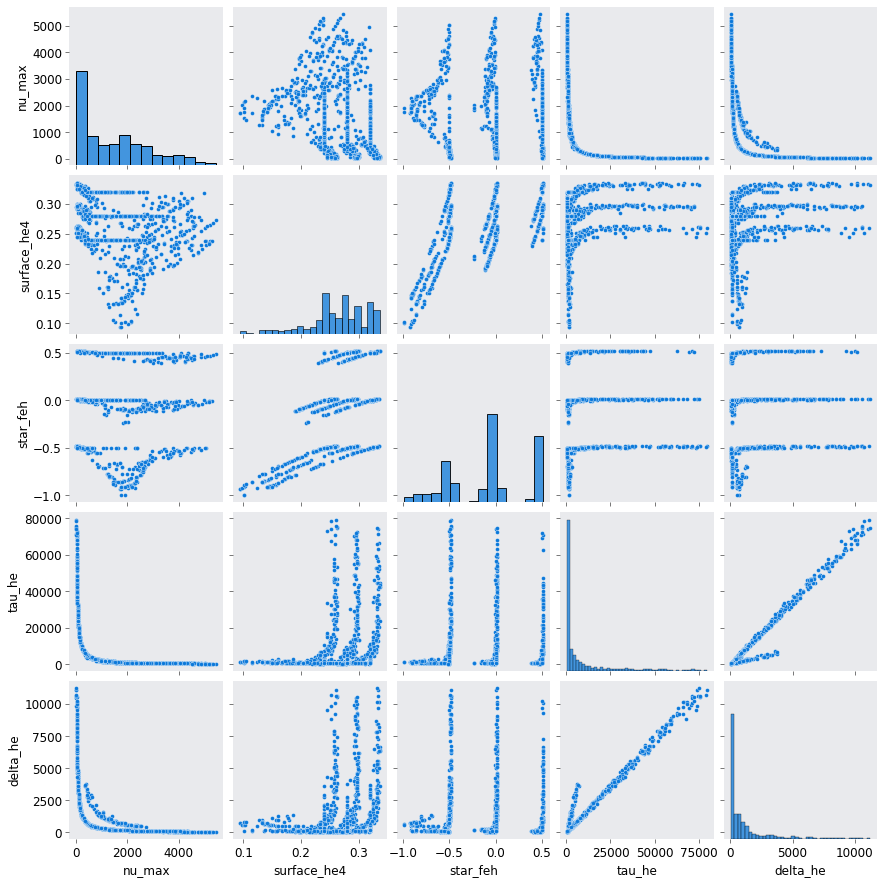

In [21]:
sns.pairplot(
    sample, 
    vars=[
        "nu_max",
        "surface_he4", 
        "star_feh",
        "tau_he",
        "delta_he",
    ]
);

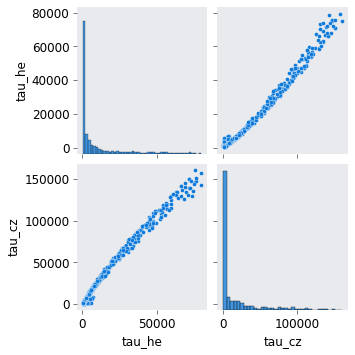

In [22]:
sns.pairplot(
    sample, 
    vars=[
        "tau_he",
        "tau_cz",
    ]
);

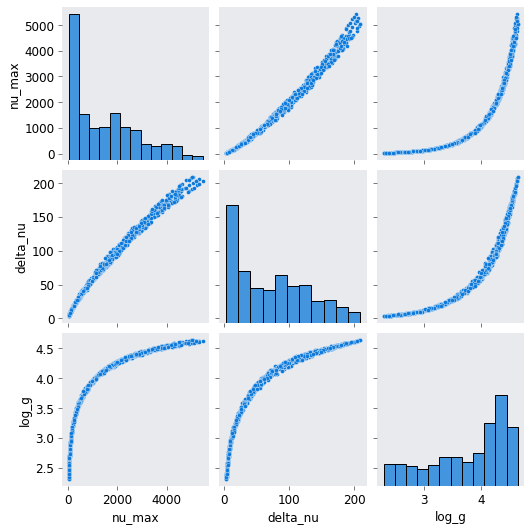

In [23]:
sns.pairplot(
    sample, 
    vars=[
        "nu_max",
        "delta_nu",
        "log_g"
    ]
);

In [7]:
n = np.arange(1, 41)
nu_cols = [f"nu_0_{i}" for i in n]

In [8]:
i = 0
nu_max = (sample["nu_max"].iloc[i], 0.05*sample["nu_max"].iloc[i])
teff = (sample["effective_T"].iloc[i], 50.0)

Mosser et al. 2010 and Pbjam prior

In [9]:
fwhm = 0.6 * nu_max[0]**0.9  # obs modes in this range

# best case senario for obs modes
nu_low = nu_max[0] - 1.5 * fwhm
nu_high = nu_max[0] + 1.5 * fwhm

In [10]:
nu = sample[nu_cols].iloc[i]
mask = (nu > nu_low) & (nu < nu_high) & (nu > 0) & (nu < sample["acoustic_cutoff"].iloc[i])
print(nu[mask])

nu_0_11     916.672504
nu_0_12     993.336961
nu_0_13    1069.023856
nu_0_14    1143.447702
nu_0_15    1217.931577
nu_0_16    1293.615741
nu_0_17    1370.685969
nu_0_18    1448.639196
nu_0_19    1526.979286
nu_0_20    1605.272761
nu_0_21    1683.213046
nu_0_22    1760.603542
nu_0_23    1837.534475
nu_0_24    1914.418686
Name: 114836, dtype: float64


Take median delta nu over all modes

In [11]:
num_orders = np.sum(mask)
central = slice(num_orders//2 - 2, num_orders//2 + 3)

delta_nu = (np.mean(np.diff(nu[mask][central])), np.std(np.diff(nu[mask][central]), ddof=1))
print(delta_nu)
model = ast.GlitchModel(nu_max, delta_nu, teff=teff)

INFO[2022-05-25 10:14:53,503]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2022-05-25 10:14:53,504]: Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2022-05-25 10:14:53,504]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


(77.91425490399024, 0.588513420052271)


In [12]:
import numpyro.distributions as dist
model.he_glitch.phi = dist.VonMises(0.0, 0.1)
model.cz_glitch.phi = dist.VonMises(0.0, 0.1)

In [13]:
infer = ast.Inference(model, n=n[mask], nu=nu[mask])

In [14]:
# model.cz_glitch.log_a = dist.Normal(4.0, 0.5)

In [18]:
model.he_glitch.log_tau = dist.Normal(-3.1, 0.05)
model.he_glitch.log_b = dist.Normal(-6.2, 0.2)
model.he_glitch.log_a = dist.Normal(-1.8, 0.2)

model.cz_glitch.log_a = dist.Normal(5.0, 0.2)
model.cz_glitch.log_tau = dist.Normal(-2.8, 0.05)

In [19]:
infer.prior_predictive()
prior_data = infer.get_data()

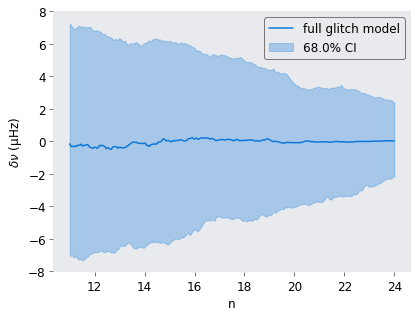

In [20]:
ast.plot_glitch(prior_data, group="prior");

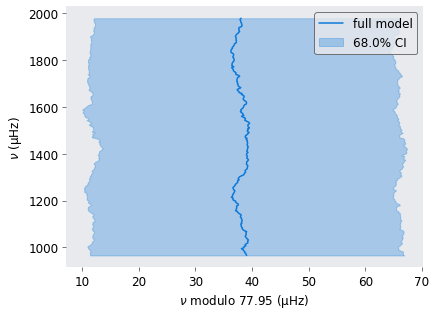

In [21]:
ast.plot_echelle(prior_data, group="prior");

In [22]:
infer.sample(method="mcmc", num_chains=5)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [23]:
infer.posterior_predictive()
data = infer.get_data()

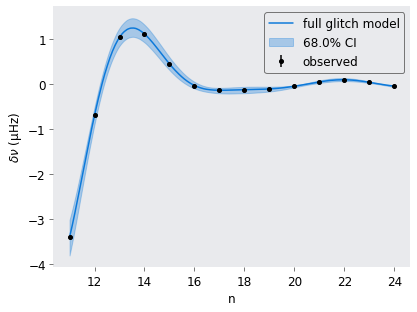

In [28]:
ast.plot_glitch(data);

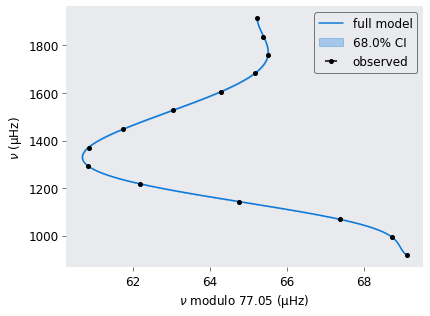

In [25]:
ast.plot_echelle(data);

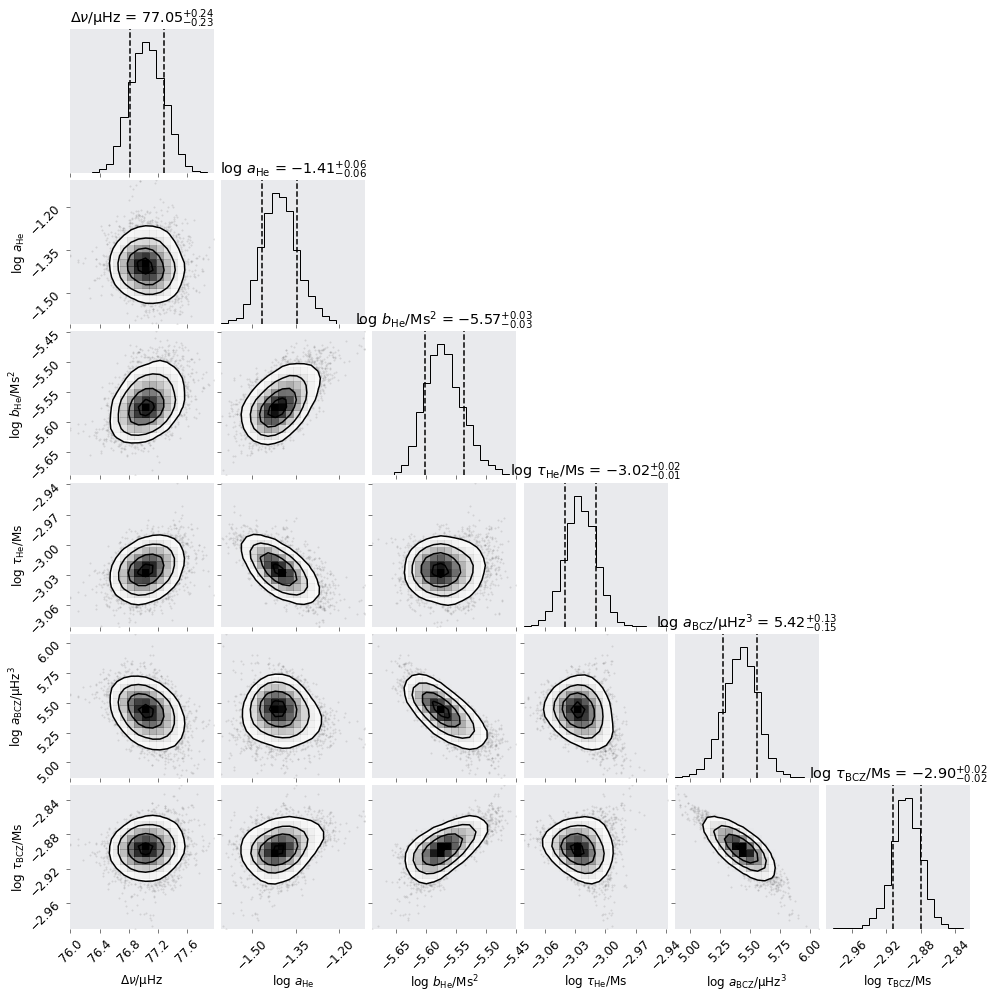

In [29]:
ast.plot_corner(
    data,
    var_names=["delta_nu", "log_a_he", "log_b_he", "log_tau_he", "log_a_cz", "log_tau_cz"]
);

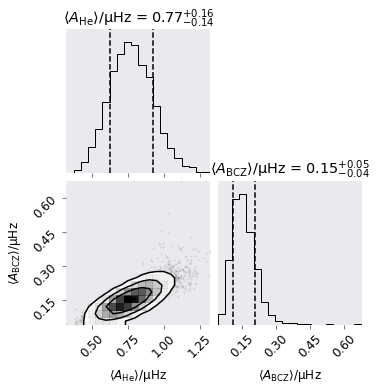

In [30]:
ast.plot_corner(data, var_names=["he_amplitude", "cz_amplitude"]);

In [31]:
summary = ast.get_table(
    data, 
    dims=(),
    var_names=[
        'a_cz', 'a_he', 'b_he', 'cz_amplitude', 'delta_nu',
        'epsilon', 'he_amplitude', 'log_a_cz', 'log_a_he',
        'log_b_he', 'log_tau_cz', 'log_tau_he', 'phi_cz',
        'phi_he', 'tau_cz', 'tau_he'
    ],
    kind="diagnostics",
    extend=True,
    round_to="none"
)
summary

a_cz         a_he          b_he  cz_amplitude  \
metric                                                              
mcse_mean    2569.403288     0.000156  6.114907e-09      0.001464   
mcse_sd      1817.255181     0.000114  4.357106e-09      0.001036   
ess_bulk     1180.899446  1636.741733  1.147276e+03   1180.899446   
ess_tail     1262.768233  1847.798394  1.505808e+03   1262.768233   
r_hat           1.003736     1.001915  1.002304e+00      1.003736   
mean       276548.328296     0.039900  2.699764e-06      0.157587   
sd          92088.452049     0.006021  2.009011e-07      0.052475   
16th       189803.811956     0.034234  2.504794e-06      0.108157   
50th       265413.920137     0.039222  2.679998e-06      0.151242   
84th       361869.631270     0.045285  2.899773e-06      0.206206   

              delta_nu      epsilon  he_amplitude     log_a_cz     log_a_he  \
metric                                                                        
mcse_mean     0.005920     0.001657      0.004169     0.004232     0.001598   
mcse_sd       0.004188     0.001172      0.002949     0.002994     0.001131   
ess_bulk   1607.234703  1591.548809   1285.618036  1180.899446  1636.741733   
ess_tail   2069.301786  2189.919580   1410.114633  1262.768233  1847.798394   
r_hat         1.001427     1.001133      1.002597     1.003736     1.001892   
mean         77.052419     0.924121      0.774681     5.418561    -1.403732   
sd            0.236426     0.065930      0.151558     0.143085     0.063384   
16th         76.821567     0.857931      0.623831     5.278305    -1.465545   
50th         77.049400     0.925363      0.768727     5.423924    -1.406473   
84th         77.288577     0.989669      0.923989     5.558552    -1.344042   

              log_b_he   log_tau_cz   log_tau_he       phi_cz       phi_he  \
metric                                                                       
mcse_mean     0.000962     0.000496     0.000409     0.033410     0.010419   
mcse_sd       0.000680     0.000351     0.000289     0.026753     0.007369   
ess_bulk   1147.276033  1271.925003  1439.535024  2101.793551  1486.853916   
ess_tail   1505.808099  1373.371699  2051.155886  2786.376924  2042.956089   
r_hat         1.002304     1.003549     1.001916     1.000956     1.002095   
mean         -5.569854    -2.896634    -3.024467    -1.118236     0.373327   
sd            0.031877     0.017587     0.015487     1.457644     0.400496   
16th         -5.601228    -2.912665    -3.039453    -2.391172    -0.012901   
50th         -5.571865    -2.896433    -3.024749    -1.405443     0.385476   
84th         -5.537636    -2.879930    -3.009442    -0.072313     0.770196   

                tau_cz        tau_he  
metric                                
mcse_mean     0.000001  8.915046e-07  
mcse_sd       0.000001  6.307406e-07  
ess_bulk   1271.925003  1.439535e+03  
ess_tail   1373.371699  2.051156e+03  
r_hat         1.003549  1.001916e+00  
mean          0.001270  9.458214e-04  
sd            0.000051  3.376076e-05  
16th          0.001223  9.131612e-04  
50th          0.001269  9.446077e-04  
84th          0.001318  9.784938e-04

In [42]:
sunsk = summary.loc[["mean", "sd", "50th", "r_hat", "ess_bulk"]].unstack()

In [43]:
sunsk

        metric  
a_cz    mean        375478.352625
        sd            1555.561932
        50th        375545.999538
        r_hat            1.001239
        ess_bulk      1239.015131
                        ...      
tau_he  mean             0.000725
        sd               0.000001
        50th             0.000725
        r_hat            1.002308
        ess_bulk       691.606313
Length: 95, dtype: float64

In [27]:
summary = summary.unstack()

In [28]:
summary

        metric
a_cz    mean      375478.352625
        sd          1555.561932
        16th      373852.505028
        50th      375545.999538
        84th      377053.814444
                      ...      
tau_he  mean           0.000725
        sd             0.000001
        16th           0.000723
        50th           0.000725
        84th           0.000726
Length: 105, dtype: float64

In [32]:
path = "/Volumes/daviesgr-cartography/mesa_grid/grid2p5_zams_rgb_ov/grid_2p5"

In [33]:
import zipfile
import gyraffe
from gyraffe.io import read_mesa_profile

In [34]:
archive_name = os.path.join(path, sample.iloc[i]["dirname"], "GYRE.zip")

In [35]:
sample.iloc[i]

filename                                                profile754
model_number                                                 902.0
evol_stage                                                     1.0
initial_mass                                                   1.1
initial_Yinit                                                 0.28
                                        ...                       
amp_he                                                   -0.001379
tau_cz                                                 1354.270367
dirname           m1.1Y0.28FeH-0.5MLT1.9ov0.005000000000000001dif1
log_nu_max                                                3.175834
log_luminosity                                            0.571002
Name: 114836, Length: 117, dtype: object

In [36]:
with zipfile.ZipFile(archive_name, 'r') as archive:
#     print(archive.namelist()[0])
    with archive.open(os.path.join(sample.iloc[i]["dirname"], sample.iloc[i]["filename"] + ".data.GYRE")) as file:
#         for i in range(10):
#             print(file.readline())
        profile = read_mesa_profile(file)

In [37]:
profile.head()

k             r           M_r           L_r             P             T  \
0  1  0.000000e+00  0.000000e+00  0.000000e+00  4.493770e+17  2.238918e+07   
1  2  5.279978e+07  1.709594e+26  4.620523e+28  4.493486e+17  2.238861e+07   
2  3  6.652386e+07  3.419187e+26  9.239603e+28  4.493300e+17  2.238825e+07   
3  4  8.381544e+07  6.838375e+26  1.847433e+29  4.493011e+17  2.238768e+07   
4  5  1.056021e+08  1.367675e+27  3.693287e+29  4.492552e+17  2.238677e+07   

          rho     nabla           N^2   Gamma_1  nabla_ad     delta       kap  \
0  277.280046  0.395961  0.000000e+00  1.661438  0.395961  0.975896  0.496739   
1  277.269469  0.395961 -1.346764e-15  1.661438  0.395961  0.975895  0.496752   
2  277.262567  0.395961 -1.835043e-15  1.661438  0.395961  0.975894  0.496761   
3  277.251824  0.395961 -2.496449e-15  1.661438  0.395961  0.975893  0.496774   
4  277.234807  0.395961 -3.395807e-15  1.661437  0.395961  0.975891  0.496795   

   kap kap_T  kap kap_rho     eps_nuc  eps_nuc*eps_T  eps_nuc*eps_rho  \
0  -0.764006     0.156367  270.296741    4361.199014       291.060352   
1  -0.764044     0.156375  270.176352    4359.277205       290.930925   
2  -0.764069     0.156380  270.097800    4358.023255       290.846476   
3  -0.764109     0.156388  269.975577    4356.072162       290.715077   
4  -0.764171     0.156401  269.782074    4352.983137       290.507047   

   Omega_rot  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [38]:
profile["c"] = gyraffe.sound_speed(profile)
profile["tau"] = gyraffe.acoustic_depth(profile)

In [39]:
def he_ionisation_zone(tau, tau_he, gamma_he, delta_he):
    return - gamma_he / np.sqrt(2*np.pi) / delta_he * np.exp(- 0.5 * (tau - tau_he)**2 / delta_he**2)

In [40]:
gamma_he = 1e6 * (data.posterior["a_he"].values / data.posterior["delta_nu"].values / 2 / np.pi).flatten()
delta_he = 1e6 * (0.5 * np.sqrt(0.5 * data.posterior["b_he"].values) / np.pi).flatten()
tau_he = 1e6 * data.posterior["tau_he"].values.flatten()

In [41]:
def logistic(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

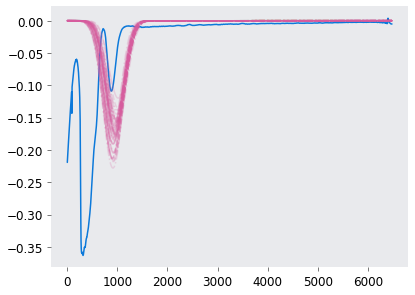

In [42]:
fig, ax = plt.subplots()
thin = 100
# x = np.linspace(0, 1000)
# gamma0 = 0.5 * logistic(profile["tau"], 500, 0.015) + 1.17
gamma0 = 1.67
y = he_ionisation_zone(profile["tau"].to_numpy()[:, None], tau_he, gamma_he, delta_he)

ax.plot(profile["tau"], -2 * (gamma0 - profile["Gamma_1"]) / (gamma0 + profile["Gamma_1"]))
ax.plot(profile["tau"], y[:, ::thin], color="C1", alpha=0.2);

In [43]:
tau_cz = 1e6 * data.posterior["tau_cz"].values.flatten()

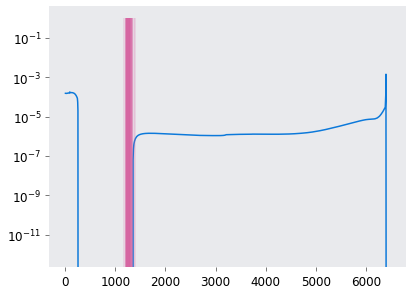

In [44]:
fig, ax = plt.subplots()

# x = np.linspace(0, 1000)
# gamma0 = 0.5 * logistic(profile["tau"], 500, 0.015) + 1.17
ax.plot(profile["tau"], profile["N^2"])
ax.vlines(tau_cz[::thin], 0, 1, color="C1", alpha=0.2)
ax.set_yscale("log")

In [341]:
1e6/2/profile["tau"].max()

76.91000405604409

In [130]:
sample.iloc[i]["tau_he"]

1534.4424382185643

In [240]:
sample.iloc[i]["initial_Yinit"]

0.24

Save data

In [81]:
cols = [
    "dirname",
    "filename",
    "initial_mass",
    "initial_Yinit",
    "initial_feh",
    "initial_MLT",
    "effective_T",
    "radius",
    "delta_nu",
    "nu_max",
    "acoustic_cutoff",
    "tau_he",
    "tau_cz",
    "surface_he4",
    "star_feh",
] + nu_cols

sample[cols].to_csv("data/mesa_sample.csv", index=False)

In [111]:
import arviz as az

In [112]:
az.to_netcdf(data, "data_test.nc")

'data_test.nc'

In [113]:
az.from_netcdf("data_test.nc")

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/arviz/data/inference_data.py:140: UserWarning: weighted_posterior group is not defined in the InferenceData scheme
  warnings.warn(


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior_predictive
	> observed_data
	> constant_data
	> weighted_posterior

In [118]:
table = ast.get_table(data, dims=(), round_to="none")

In [133]:
table = table.unstack()

In [44]:
new_index = ["_".join(i) for i in sunsk.index]

In [45]:
with open("data/summary.csv", "w") as file:
    file.write("index,")
    file.write(",".join(new_index) + "\n")

In [166]:
out = [str(i)] + table.astype(str).to_list()

In [168]:
with open("data/summary.csv", "a") as file:
    file.write(",".join(out) + "\n")

## Results

In [57]:
results = pd.read_csv("data/mesa_results.csv", index_col="index")
results.head()

a_cz_mean        a_cz_sd     a_cz_16th     a_cz_50th     a_cz_84th  \
index                                                                          
4      3.199787e+02     158.507395  1.739916e+02  2.796542e+02  4.810749e+02   
1      4.381341e+05   48079.521587  3.901743e+05  4.329535e+05  4.901625e+05   
2      1.752942e+06   40164.054441  1.717204e+06  1.754757e+06  1.791783e+06   
3      4.648728e+05  151035.256911  3.175466e+05  4.435797e+05  6.221729e+05   
0      7.476828e+04    3635.447332  7.096417e+04  7.501800e+04  7.827400e+04   

       a_he_mean   a_he_sd  a_he_16th  a_he_50th  a_he_84th  ...  tau_cz_mean  \
index                                                        ...                
4       0.013305  0.000861   0.012429   0.013309   0.014203  ...     0.052554   
1       0.077633  0.015510   0.061200   0.076991   0.092812  ...     0.002567   
2       0.000621  0.000106   0.000510   0.000607   0.000734  ...     0.001971   
3       0.048304  0.011793   0.037826   0.046390   0.059163  ...     0.006032   
0       0.008958  0.001032   0.007939   0.008902   0.010009  ...     0.004200   

       tau_cz_sd  tau_cz_16th  tau_cz_50th  tau_cz_84th  tau_he_mean  \
index                                                                  
4       0.004729     0.047185     0.052566     0.057944     0.016118   
1       0.000011     0.002556     0.002565     0.002577     0.000789   
2       0.000003     0.001967     0.001971     0.001974     0.000735   
3       0.000059     0.005969     0.006036     0.006096     0.001012   
0       0.000034     0.004166     0.004203     0.004236     0.001515   

       tau_he_sd  tau_he_16th  tau_he_50th  tau_he_84th  
index                                                    
4       0.000097     0.016021     0.016113     0.016215  
1       0.000012     0.000778     0.000788     0.000802  
2       0.000005     0.000730     0.000736     0.000740  
3       0.000016     0.000995     0.001013     0.001028  
0       0.000019     0.001496     0.001514     0.001533  

[5 rows x 95 columns]

In [58]:
total = sample.reset_index(drop=True).merge(results, left_index=True, right_index=True)
total.head()

filename  model_number  evol_stage  initial_mass  initial_Yinit  \
0   profile754         902.0         1.0           1.1           0.28   
1   profile655         803.0         1.0           1.2           0.28   
2  profile1207        1820.0         2.0           1.4           0.28   
3   profile649         797.0         1.0           0.8           0.32   
4   profile745         893.0         1.0           0.8           0.24   

   initial_Zinit  initial_feh  initial_MLT  initial_fov  star_mass  ...  \
0       0.004097         -0.5          1.9          0.0   1.100000  ...   
1       0.012800          0.0          2.3          0.0   1.200000  ...   
2       0.038980          0.5          2.1          0.0   1.397725  ...   
3       0.036803          0.5          2.3          0.0   0.800000  ...   
4       0.004324         -0.5          2.3          0.0   0.800000  ...   

   tau_cz_mean  tau_cz_sd  tau_cz_16th  tau_cz_50th  tau_cz_84th  tau_he_mean  \
0     0.004200   0.000034     0.004166     0.004203     0.004236     0.001515   
1     0.002567   0.000011     0.002556     0.002565     0.002577     0.000789   
2     0.001971   0.000003     0.001967     0.001971     0.001974     0.000735   
3     0.006032   0.000059     0.005969     0.006036     0.006096     0.001012   
4     0.052554   0.004729     0.047185     0.052566     0.057944     0.016118   

   tau_he_sd  tau_he_16th  tau_he_50th  tau_he_84th  
0   0.000019     0.001496     0.001514     0.001533  
1   0.000012     0.000778     0.000788     0.000802  
2   0.000005     0.000730     0.000736     0.000740  
3   0.000016     0.000995     0.001013     0.001028  
4   0.000097     0.016021     0.016113     0.016215  

[5 rows x 212 columns]

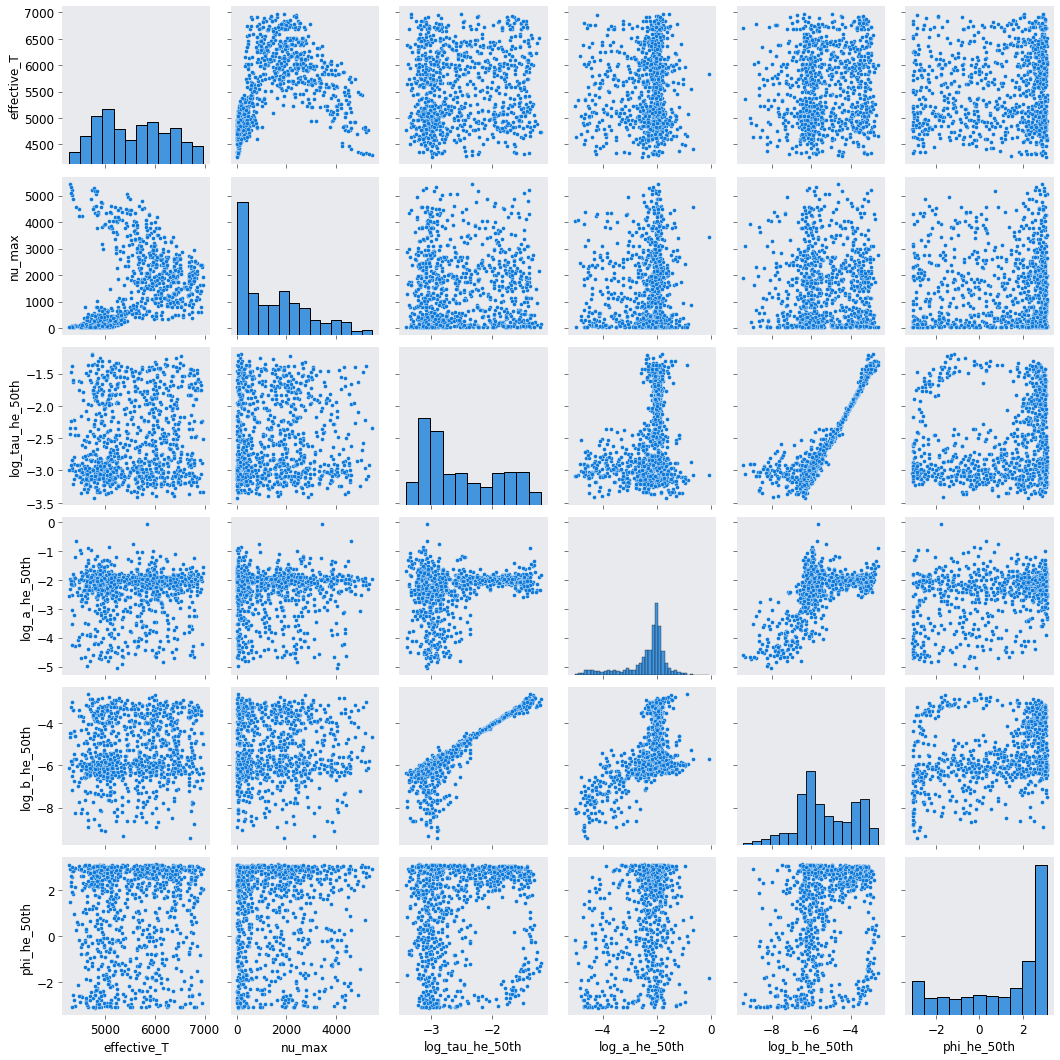

In [59]:
sns.pairplot(
    total, 
    vars=[
        "effective_T",
        "nu_max",
        "log_tau_he_50th",
        "log_a_he_50th",
        "log_b_he_50th",
        "phi_he_50th"
    ]
);

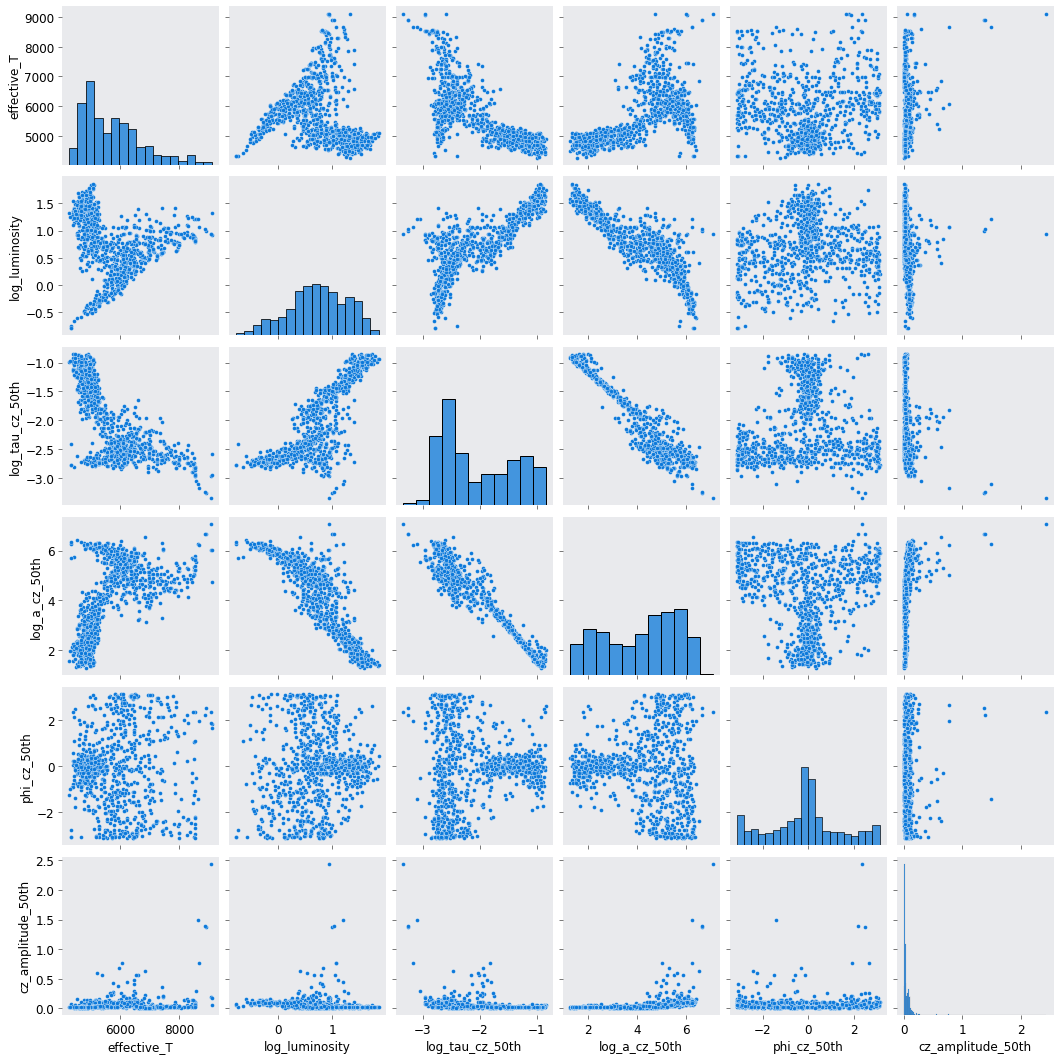

In [46]:
sns.pairplot(
    total, 
    vars=[
        "effective_T",
        "log_luminosity",
        "log_tau_cz_50th",
        "log_a_cz_50th",
        "phi_cz_50th",
        "cz_amplitude_50th",
    ]
);

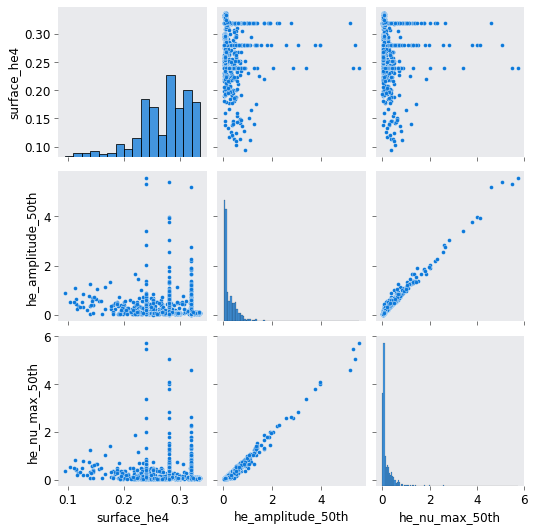

In [49]:
sns.pairplot(
    total, 
    vars=[
        "surface_he4",
        "he_amplitude_50th",
        "he_nu_max_50th",
    ]
);

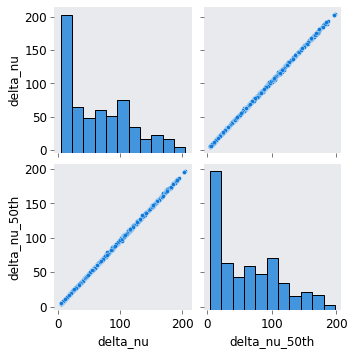

In [55]:
sns.pairplot(
    total, 
    vars=[
        "delta_nu",
        "delta_nu_50th",
    ]
);

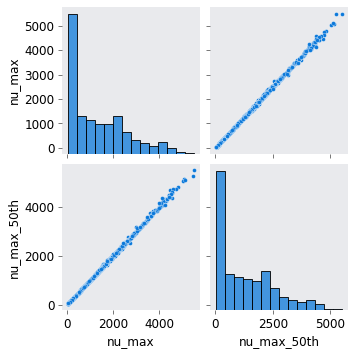

In [56]:
sns.pairplot(
    total, 
    vars=[
        "nu_max",
        "nu_max_50th",
    ]
);

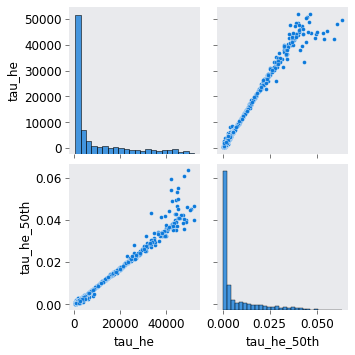

In [59]:
sns.pairplot(
    total, 
    vars=[
        "tau_he",
        "tau_he_50th",
    ]
);

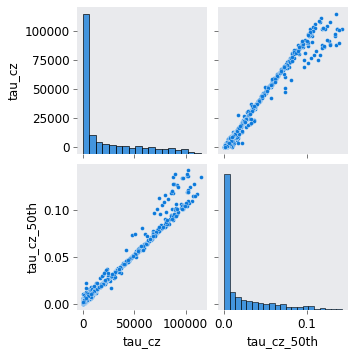

In [60]:
sns.pairplot(
    total, 
    vars=[
        "tau_cz",
        "tau_cz_50th",
    ]
);

Compare the prior to the posterior

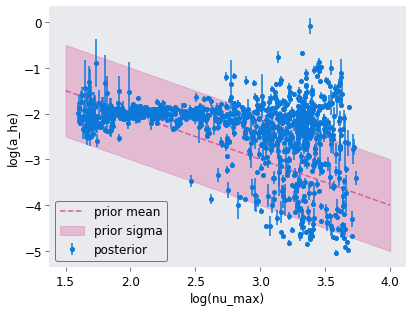

In [61]:
fig, ax = plt.subplots()

ax.errorbar(
    np.log10(total["nu_max_mean"]), 
    total["log_a_he_mean"], 
    yerr=total["log_a_he_sd"],
    marker="o", 
    linestyle="none", 
    label="posterior"
)

log_numax = np.linspace(1.5, 4.0)
log_a = - log_numax
line, = ax.plot(log_numax, log_a, label="prior mean")
ax.fill_between(log_numax, log_a-1.0, log_a+1.0, color=line.get_color(), alpha=0.33, label="prior sigma") 

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(a_he)")
ax.legend();

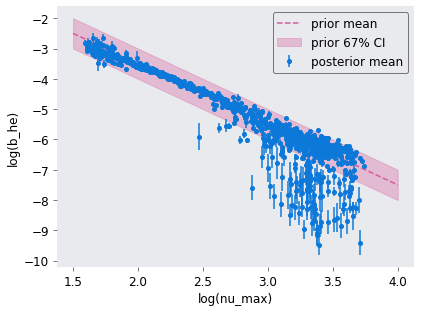

In [74]:
fig, ax = plt.subplots()

ax.errorbar(
    np.log10(total["nu_max_mean"]), 
    total["log_b_he_mean"], 
    yerr=total["log_b_he_sd"],
    marker="o", 
    linestyle="none", 
    label="posterior mean"
)

log_numax = np.linspace(1.5, 4.0)
log_b = - 2.0 * log_numax + 0.5
line, = ax.plot(log_numax, log_b, label="prior mean")
ax.fill_between(log_numax, log_b-0.5, log_b+0.5, color=line.get_color(), alpha=0.33, label="prior 67% CI") 

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend();

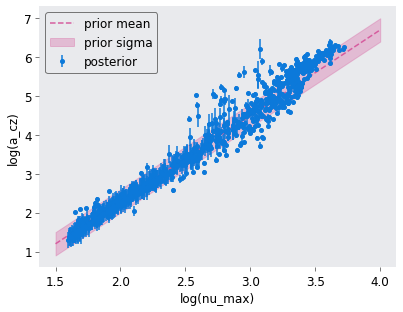

In [65]:
fig, ax = plt.subplots()

mask = (total["effective_T"] < 7000) & (total["log_a_he_mean"] > -3.0)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_a_cz_mean"], 
    yerr=total.loc[mask, "log_a_cz_sd"],
    marker="o", 
    linestyle="none", 
    label="posterior"
)

log_numax = np.linspace(1.5, 4.0)
log_a = 2.2 * log_numax - 2.1
sigma = 0.3
line, = ax.plot(log_numax, log_a, label="prior mean")
ax.fill_between(log_numax, log_a-sigma, log_a+sigma, color=line.get_color(), alpha=0.33, label="prior sigma") 

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(a_cz)")
ax.legend();

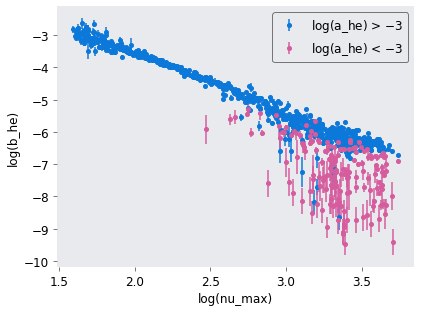

In [126]:
fig, ax = plt.subplots()

mask = (total["log_a_he_mean"] < -3.0)
ax.errorbar(
    np.log10(total.loc[~mask, "nu_max"]), 
    total.loc[~mask, "log_b_he_mean"], 
    yerr=total.loc[~mask, "log_b_he_sd"],
    marker="o", 
    linestyle="none", 
    label="log(a_he) > $-3$"
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max"]), 
    total.loc[mask, "log_b_he_mean"], 
    yerr=total.loc[mask, "log_b_he_sd"],
    marker="o", 
    linestyle="none", 
    label="log(a_he) < $-3$"
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend();

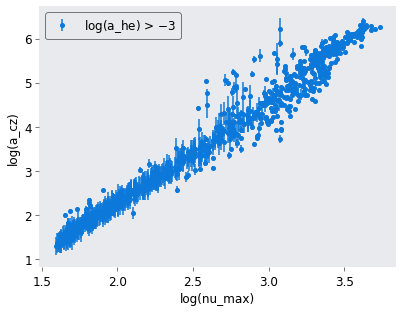

In [302]:
fig, ax = plt.subplots()

mask = (total["log_a_he_mean"] < -3.0)
ax.errorbar(
    np.log10(total.loc[~mask, "nu_max"]), 
    total.loc[~mask, "log_a_cz_mean"], 
    yerr=total.loc[~mask, "log_a_cz_sd"],
    marker="o", 
    linestyle="none", 
    label="log(a_he) > $-3$"
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(a_cz)")
ax.legend();

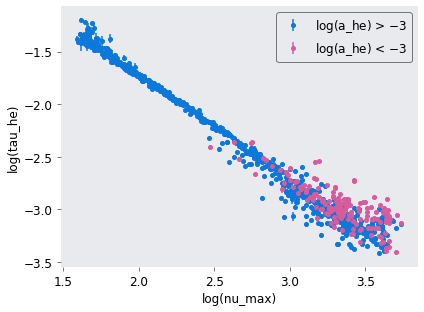

In [128]:
fig, ax = plt.subplots()

ax.errorbar(
    np.log10(total.loc[~mask, "nu_max"]), 
    total.loc[~mask, "log_tau_he_mean"], 
    yerr=total.loc[~mask, "log_tau_he_sd"],
    marker="o", 
    linestyle="none", 
    label="log(a_he) > $-3$"
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max"]), 
    total.loc[mask, "log_tau_he_mean"], 
    yerr=total.loc[mask, "log_tau_he_sd"],
    marker="o", 
    linestyle="none", 
    label="log(a_he) < $-3$"
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(tau_he)")
ax.legend();

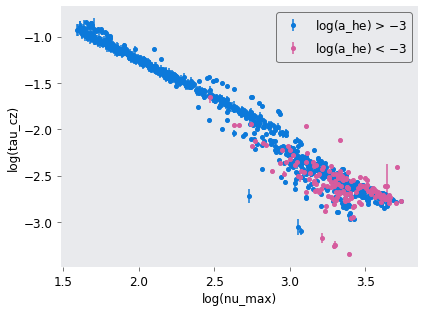

In [129]:
fig, ax = plt.subplots()

ax.errorbar(
    np.log10(total.loc[~mask, "nu_max"]), 
    total.loc[~mask, "log_tau_cz_mean"], 
    yerr=total.loc[~mask, "log_tau_cz_sd"],
    marker="o", 
    linestyle="none", 
    label="log(a_he) > $-3$"
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max"]), 
    total.loc[mask, "log_tau_cz_mean"], 
    yerr=total.loc[mask, "log_tau_cz_sd"],
    marker="o", 
    linestyle="none", 
    label="log(a_he) < $-3$"
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(tau_cz)")
ax.legend();

In [68]:
def logistic(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

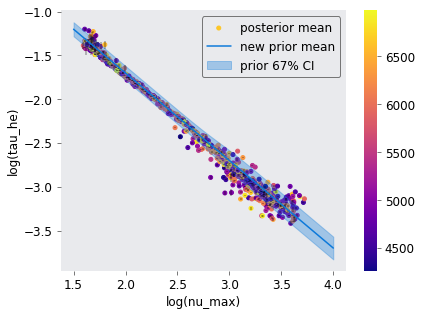

In [72]:
fig, ax = plt.subplots()

mask = (total["effective_T"] < 7000) & (total["log_a_he_mean"] > -3.0)

s = ax.scatter(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_tau_he_mean"], 
    c=total.loc[mask, "effective_T"],
    label="posterior mean",
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_tau_he_mean"], 
    yerr=total.loc[mask, "log_tau_he_sd"],
    linestyle="none",
    color="black",
    alpha=0.33,
)

x0 = 2.9
k = 10.0
log_tau_he = - log_numax + 0.3
sigma = 0.08 + 0.05 * logistic(log_numax, x0, k)
line, = ax.plot(log_numax, log_tau_he, label="new prior mean")
ax.fill_between(log_numax, log_tau_he-sigma, log_tau_he+sigma, color=line.get_color(), alpha=0.33, label="prior 67% CI") 

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(tau_he)")
ax.legend()

fig.colorbar(s);

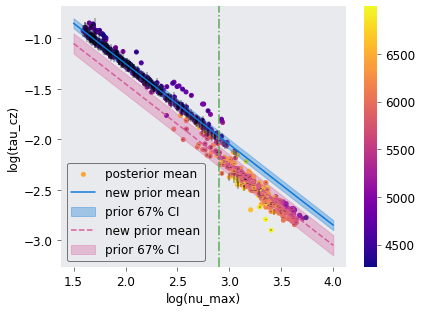

In [271]:
fig, ax = plt.subplots()

mask = (total["effective_T"] < 7000) & (total["log_a_he_mean"] > -3.0)
s = ax.scatter(
    np.log10(total.loc[mask, "nu_max"]), 
    total.loc[mask, "log_tau_cz_mean"], 
    c=total.loc[mask, "effective_T"],
    label="posterior mean",
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max"]), 
    total.loc[mask, "log_tau_cz_mean"], 
    yerr=total.loc[mask, "log_tau_cz_sd"],
    linestyle="none",
    color="black",
    alpha=0.33,
)

log_teff = np.linspace(3.6, 3.9)
log_tau_cz = - 0.8 * log_numax + 0.35
line, = ax.plot(log_numax, log_tau_cz, label="new prior mean")
ax.fill_between(log_numax, log_tau_cz-0.05, log_tau_cz+0.05, color=line.get_color(), alpha=0.33, label="prior 67% CI") 

log_tau_cz = - 0.8 * log_numax + 0.15
line, = ax.plot(log_numax, log_tau_cz, label="new prior mean")
ax.fill_between(log_numax, log_tau_cz-0.1, log_tau_cz+0.1, color=line.get_color(), alpha=0.33, label="prior 67% CI") 

ax.axvline(2.9, color="C2", linestyle="-.")
ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(tau_cz)")
ax.legend()

fig.colorbar(s);

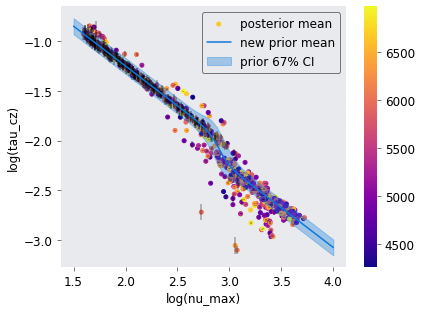

In [70]:
fig, ax = plt.subplots()

mask = (total["effective_T"] < 7000) & (total["log_a_he_mean"] > -3.0)
s = ax.scatter(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_tau_cz_mean"], 
    c=total.loc[mask, "effective_T"],
    label="posterior mean",
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_tau_cz_mean"], 
    yerr=total.loc[mask, "log_tau_cz_sd"],
    linestyle="none",
    color="black",
    alpha=0.33,
)

x0 = 2.9
k = 20.0
log_tau_cz = - 0.225 * logistic(log_numax, x0, k) - 0.8 * log_numax + 0.35
# sigma = 0.05 + 0.025 * logistic(log_numax, x0, k)
sigma = 0.08 + 0.1 * np.exp(- 0.5 * (log_numax - x0)**2/0.1**2)
line, = ax.plot(log_numax, log_tau_cz, label="new prior mean")
ax.fill_between(log_numax, log_tau_cz-sigma, log_tau_cz+sigma, color=line.get_color(), alpha=0.33, label="prior 67% CI") 

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(tau_cz)")
ax.legend()

fig.colorbar(s);

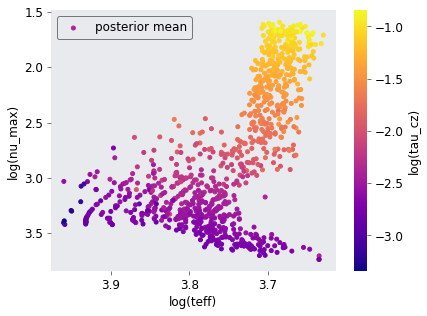

In [261]:
fig, ax = plt.subplots()

# mask = total["star_feh"] > 0.49

s = ax.scatter(
    np.log10(total["effective_T"]), 
    np.log10(total["nu_max"]), 
    c=total["log_tau_cz_mean"],
    label="posterior mean",
)

# ax.errorbar(
#     np.log10(total["nu_max"]), 
#     total["log_tau_cz_mean"], 
#     yerr=total["log_tau_cz_sd"],
#     linestyle="none",
#     color="black",
#     alpha=0.33,
# )

ax.set_xlabel("log(teff)")
ax.set_ylabel("log(nu_max)")
ax.legend()
ax.invert_xaxis()
ax.invert_yaxis()
fig.colorbar(s, label="log(tau_cz)");

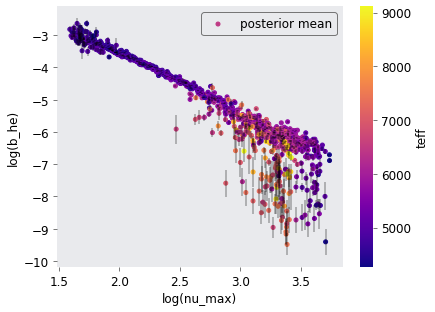

In [92]:
fig, ax = plt.subplots()

s = ax.scatter(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    c=total["effective_T"],
    label="posterior mean",
)

ax.errorbar(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    yerr=total["log_b_he_sd"],
    linestyle="none", 
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend()

fig.colorbar(s, label="teff");

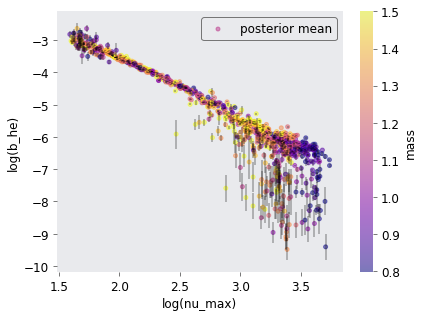

In [98]:
fig, ax = plt.subplots()

s = ax.scatter(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    c=total["star_mass"],
    label="posterior mean",
    alpha=0.5,
)

ax.errorbar(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    yerr=total["log_b_he_sd"],
    linestyle="none", 
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend()

fig.colorbar(s, label="mass");

In [101]:
total.columns[:50]

Index(['filename', 'model_number', 'evol_stage', 'initial_mass',
       'initial_Yinit', 'initial_Zinit', 'initial_feh', 'initial_MLT',
       'initial_fov', 'star_mass', 'star_age', 'ms_age', 'frac_age',
       'effective_T', 'luminosity', 'radius', 'log_g', 'surface_h1',
       'surface_he4', 'surface_Z', 'star_feh', 'center_h1', 'center_he4',
       'log_center_T', 'log_center_Rho', 'he_core_mass', 'delta_nu',
       'delta_Pg', 'nu_max', 'acoustic_cutoff', 'nu_0_1', 'nu_0_2', 'nu_0_3',
       'nu_0_4', 'nu_0_5', 'nu_0_6', 'nu_0_7', 'nu_0_8', 'nu_0_9', 'nu_0_10',
       'nu_0_11', 'nu_0_12', 'nu_0_13', 'nu_0_14', 'nu_0_15', 'nu_0_16',
       'nu_0_17', 'nu_0_18', 'nu_0_19', 'nu_0_20'],
      dtype='object')

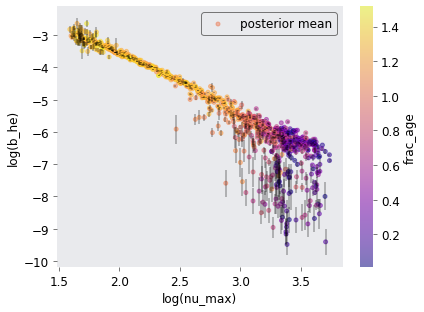

In [111]:
fig, ax = plt.subplots()

s = ax.scatter(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    c=total["frac_age"],
    label="posterior mean",
    alpha=0.5,
)

ax.errorbar(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    yerr=total["log_b_he_sd"],
    linestyle="none", 
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend()

fig.colorbar(s, label="frac_age");

Lower b represents more slowly decaying glitches. The glitch decays slowly when the depression in the adiabatic gradient is acoustically narrow. This could occur when the region of helium ionisation is small, possibly when the temperature gradient is high? 

Calculate whether diffusion is used.

In [84]:
total["delta_feh"] = total["initial_feh"] - total["star_feh"]
total["log_nu_max"] = np.log10(total["nu_max"])
total["dif"] = 1
total.loc[total["delta_feh"].abs() < 0.01, "dif"] = 0

Index(['filename', 'model_number', 'evol_stage', 'initial_mass',
       'initial_Yinit', 'initial_Zinit', 'initial_feh', 'initial_MLT',
       'initial_fov', 'star_mass', 'star_age', 'ms_age', 'frac_age',
       'effective_T', 'luminosity', 'radius', 'log_g', 'surface_h1',
       'surface_he4', 'surface_Z', 'star_feh', 'center_h1', 'center_he4',
       'log_center_T', 'log_center_Rho', 'he_core_mass', 'delta_nu',
       'delta_Pg', 'nu_max', 'acoustic_cutoff', 'nu_0_1', 'nu_0_2', 'nu_0_3',
       'nu_0_4', 'nu_0_5', 'nu_0_6', 'nu_0_7', 'nu_0_8', 'nu_0_9', 'nu_0_10',
       'nu_0_11', 'nu_0_12', 'nu_0_13', 'nu_0_14', 'nu_0_15', 'nu_0_16',
       'nu_0_17', 'nu_0_18', 'nu_0_19', 'nu_0_20'],
      dtype='object')

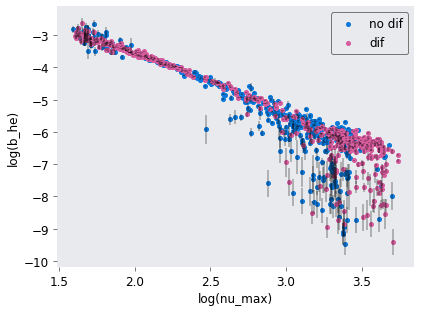

In [91]:
fig, ax = plt.subplots()

is_dif = total["dif"] == 1

ax.scatter(
    np.log10(total.loc[~is_dif, "nu_max"]), 
    total.loc[~is_dif, "log_b_he_mean"], 
    label="no dif",
)

ax.scatter(
    np.log10(total.loc[is_dif, "nu_max"]), 
    total.loc[is_dif, "log_b_he_mean"], 
    label="dif",
)

ax.errorbar(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    yerr=total["log_b_he_sd"],
    linestyle="none", 
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend()

Heavy-element diffusion is included for higher mass stars > 1.2 Msun (?). So 

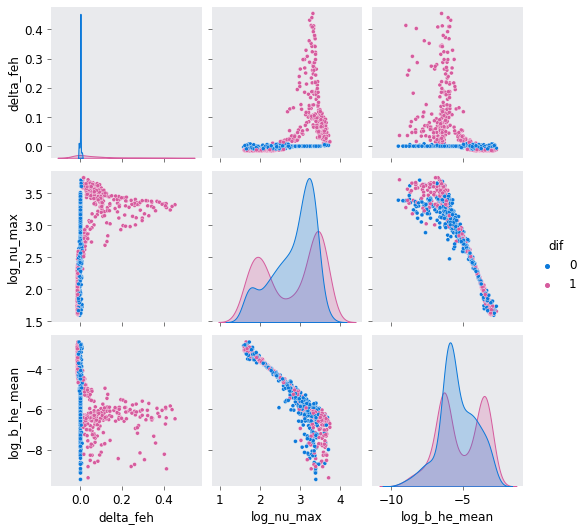

In [69]:
sns.pairplot(
    total, 
    vars=[
        "delta_feh",
        "log_nu_max",
        "log_b_he_mean",
    ],
    hue="dif"
);

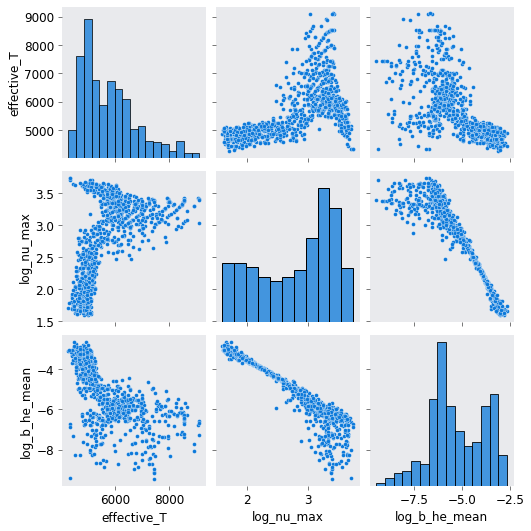

In [70]:
sns.pairplot(
    total, 
    vars=[
        "effective_T",
        "log_nu_max",
        "log_b_he_mean",
    ],
#     hue=""
);

Text(0, 0.5, 'asterion tau_he (Ms)')

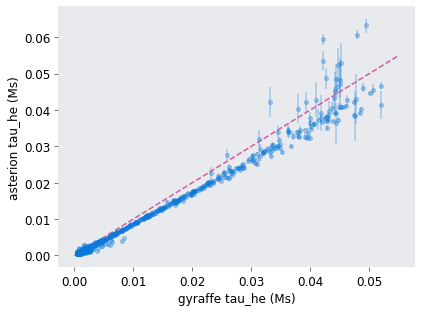

In [78]:
fig, ax = plt.subplots()

ax.errorbar(1e-6*total["tau_he"], total["tau_he_mean"], yerr=total["tau_he_sd"],
           linestyle='none', marker="o", alpha=0.33)
ax.plot(*np.linspace([0]*2, [0.055]*2, axis=1))
ax.set_xlabel("gyraffe tau_he (Ms)")
ax.set_ylabel("asterion tau_he (Ms)")

This tells us that gyraffe over-predicts the acoustic depth measured by asterion. Or, asterion under-predicts the acoustic depth of the depression in the second helium ionisation zone.

Text(0, 0.5, 'asterion tau_cz (Ms)')

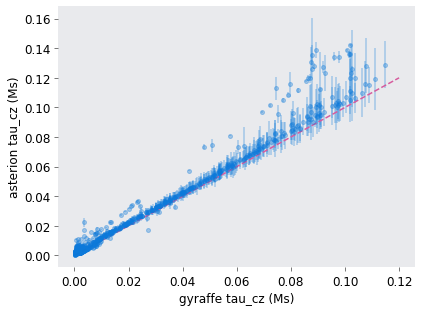

In [80]:
fig, ax = plt.subplots()

ax.errorbar(1e-6*total["tau_cz"], total["tau_cz_mean"], yerr=total["tau_cz_sd"],
           linestyle='none', marker="o", alpha=0.33)
ax.plot(*np.linspace([0]*2, [0.12]*2, axis=1))
ax.set_xlabel("gyraffe tau_cz (Ms)")
ax.set_ylabel("asterion tau_cz (Ms)")

On the contrary, gyraffe slightly under-predicts the acoustic depth of the base of the convective zone.

In [147]:
mask = (1e-6*total["tau_cz"] - total["tau_cz_mean"]) < - 0.01
total.loc[mask].head()

filename  model_number  evol_stage  initial_mass  initial_Yinit  \
23   profile929        1290.0         2.0           1.3           0.28   
31   profile919        1270.0         2.0           1.3           0.28   
39  profile1168        1706.0         2.0           1.1           0.24   
44  profile1062        1568.0         2.0           1.2           0.32   
79   profile928        1282.0         2.0           1.0           0.32   

    initial_Zinit  initial_feh  initial_MLT  initial_fov  star_mass  ...  \
23       0.038980          0.5          2.3          0.0   1.299317  ...   
31       0.038980          0.5          2.3          0.0   1.299353  ...   
39       0.013509          0.0          1.9          0.0   1.097448  ...   
44       0.036814          0.5          1.9          0.0   1.198521  ...   
79       0.036805          0.5          1.9          0.0   0.999055  ...   

    tau_cz_mean  tau_cz_sd  tau_cz_16th  tau_cz_50th  tau_cz_84th  \
23     0.036878   0.000365     0.036587     0.036888     0.037097   
31     0.033860   0.000231     0.033659     0.033859     0.034039   
39     0.119861   0.016619     0.101566     0.124091     0.134886   
44     0.096134   0.008234     0.090131     0.098348     0.100618   
79     0.035959   0.000497     0.035415     0.036035     0.036354   

    tau_he_mean  tau_he_sd  tau_he_16th  tau_he_50th  tau_he_84th  
23     0.006768   0.000041     0.006728     0.006770     0.006813  
31     0.006065   0.000055     0.006001     0.006073     0.006122  
39     0.045579   0.001585     0.044273     0.045075     0.047026  
44     0.030037   0.000358     0.029691     0.030013     0.030364  
79     0.006978   0.000045     0.006929     0.006985     0.007023  

[5 rows x 211 columns]

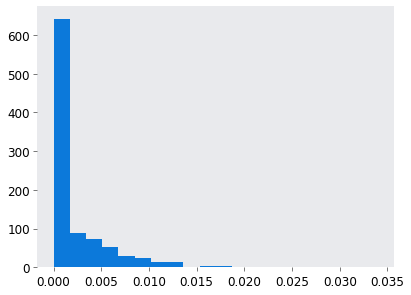

In [170]:
fig, ax = plt.subplots()

ax.hist(total["tau_cz_sd"], bins=20);

In [90]:
idx = ((1e-6*total["tau_cz"] - total["tau_cz_mean"])**2).idxmax()

In [123]:
n_pred = np.linspace(1, 18, 501)
nu_bkg = (total.loc[idx, "epsilon_mean"] + n_pred) * total.loc[idx, "delta_nu_mean"]
he_glitch = (
    total.loc[idx, "a_he_mean"]*nu_bkg
    *np.exp(-total.loc[idx, "b_he_mean"]*nu_bkg**2)
    *np.sin(4*np.pi*total.loc[idx, "tau_he_mean"]*nu_bkg + total.loc[idx, "phi_he_mean"])
)
cz_glitch = (
    total.loc[idx, "a_cz_mean"]/nu_bkg**2
    *np.sin(4*np.pi*total.loc[idx, "tau_cz_mean"]*nu_bkg + total.loc[idx, "phi_cz_mean"])
)

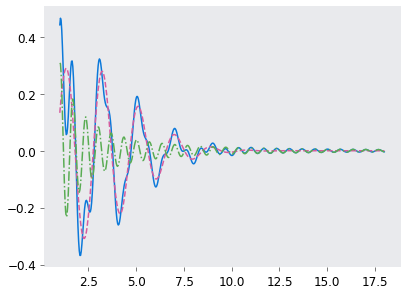

In [124]:
fig, ax = plt.subplots()
ax.plot(n_pred, he_glitch + cz_glitch)
ax.plot(n_pred, he_glitch)
ax.plot(n_pred, cz_glitch)

Mosser et al. 2010 and Pbjam prior

In [125]:
fwhm = 0.6 * total.loc[idx, "nu_max"]**0.9  # obs modes in this range

# best case senario for obs modes
nu_low = total.loc[idx, "nu_max"] - fwhm
nu_high = total.loc[idx, "nu_max"] + fwhm

In [126]:
nu = total.loc[idx, nu_cols]
mask = (nu > nu_low) & (nu < nu_high) & (nu > 0) & (nu < total.loc[idx, "acoustic_cutoff"])
print(nu[mask])

nu_0_5     32.746088
nu_0_6      37.83007
nu_0_7     43.132697
nu_0_8     48.541353
nu_0_9     54.008958
nu_0_10      59.6145
nu_0_11    65.209175
Name: 788, dtype: object


In [127]:
nu_bkg = (total.loc[idx, "epsilon_mean"] + n[mask]) * total.loc[idx, "delta_nu_mean"]
he_glitch_obs = (
    total.loc[idx, "a_he_mean"]*nu_bkg
    *np.exp(-total.loc[idx, "b_he_mean"]*nu_bkg**2)
    *np.sin(4*np.pi*total.loc[idx, "tau_he_mean"]*nu_bkg + total.loc[idx, "phi_he_mean"])
)
cz_glitch_obs = (
    total.loc[idx, "a_cz_mean"]/nu_bkg**2
    *np.sin(4*np.pi*total.loc[idx, "tau_cz_mean"]*nu_bkg + total.loc[idx, "phi_cz_mean"])
)

(-0.3, 0.3)

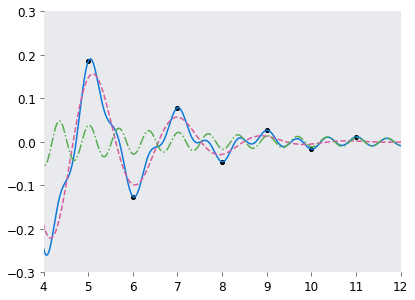

In [131]:
fig, ax = plt.subplots()
ax.plot(n[mask], he_glitch_obs + cz_glitch_obs, marker="o", linestyle="none", color="black")
ax.plot(n_pred, he_glitch + cz_glitch)
ax.plot(n_pred, he_glitch)
ax.plot(n_pred, cz_glitch)
ax.set_xlim(n[mask].min()-1, n[mask].max()+1)
ax.set_ylim(-0.3, 0.3)

In [133]:
total.loc[idx, "cz_amplitude_50th"]

0.0205347228985314

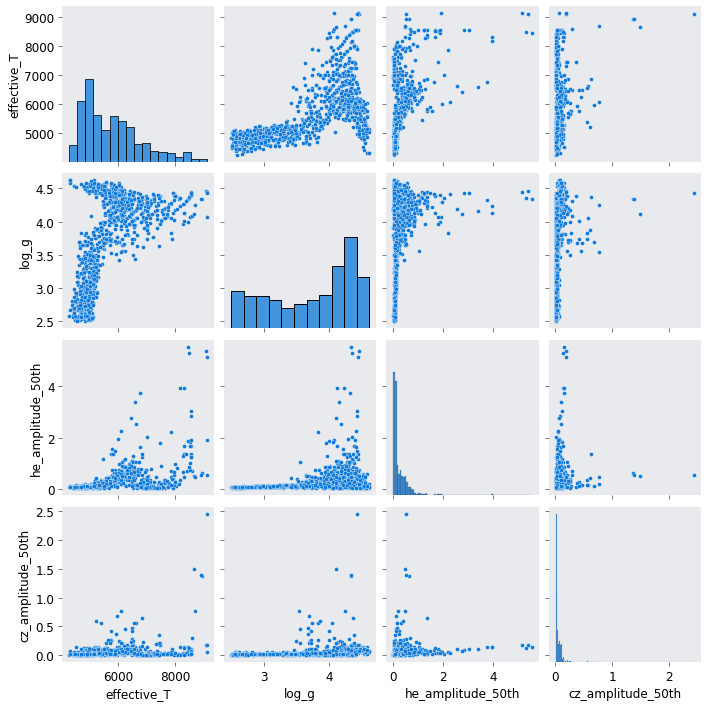

In [132]:
sns.pairplot(
    total, 
    vars=[
        "effective_T",
        "log_g",
        "he_amplitude_50th",
        "cz_amplitude_50th",
    ]
);

In [8]:
mean_cols = [col for col in total.columns if "_mean" in col]
sd_cols = [col for col in total.columns if "_sd" in col]

print(mean_cols)
print(sd_cols)

assert len(mean_cols) == len(sd_cols)

['a_cz_mean', 'a_he_mean', 'b_he_mean', 'cz_amplitude_mean', 'cz_nu_max_mean', 'delta_nu_mean', 'epsilon_mean', 'he_amplitude_mean', 'he_nu_max_mean', 'log_a_cz_mean', 'log_a_he_mean', 'log_b_he_mean', 'log_tau_cz_mean', 'log_tau_he_mean', 'nu_max_mean', 'phi_cz_mean', 'phi_he_mean', 'tau_cz_mean', 'tau_he_mean']
['a_cz_sd', 'a_he_sd', 'b_he_sd', 'cz_amplitude_sd', 'cz_nu_max_sd', 'delta_nu_sd', 'epsilon_sd', 'he_amplitude_sd', 'he_nu_max_sd', 'log_a_cz_sd', 'log_a_he_sd', 'log_b_he_sd', 'log_tau_cz_sd', 'log_tau_he_sd', 'nu_max_sd', 'phi_cz_sd', 'phi_he_sd', 'tau_cz_sd', 'tau_he_sd']


In [37]:
total[mean_cols].shape

(950, 19)

In [38]:
mcsamples = (
    total[mean_cols].to_numpy() + total[sd_cols].to_numpy() * np.random.normal(size=(1000,)+total[mean_cols].shape)
)
mcsamples.shape

(1000, 950, 19)

In [39]:
mcsamples = mcsamples.reshape((mcsamples.shape[0]*mcsamples.shape[1], mcsamples.shape[2]))
# np.reshape()
mc = pd.DataFrame(mcsamples, columns=[s[:-5] for s in mean_cols])
mc.head()

a_cz      a_he          b_he  cz_amplitude  cz_nu_max    delta_nu  \
0  7.712563e+04  0.010563  1.970308e-06      0.036767   0.039974   73.408345   
1  4.533748e+05  0.071376  1.464667e-06      0.085857   0.095078  100.892608   
2  1.736941e+06  0.000661  1.772742e-07      0.088668   0.082224  171.942621   
3  6.108239e+05  0.048709  2.703383e-06      0.226109   0.165252   70.236729   
4  3.085517e+02  0.012364  2.222389e-04      0.034707   0.041451    9.342051   

    epsilon  he_amplitude  he_nu_max  log_a_cz  log_a_he  log_b_he  \
0  1.007116      0.341027   0.257493  4.862997 -2.033217 -5.704467   
1  1.285145      0.378977   0.110703  5.634922 -1.179421 -5.829832   
2  1.620209      0.081248   0.060269  6.245006 -3.172286 -6.716150   
3  1.030813      0.295936   0.264118  5.504785 -1.362370 -5.509248   
4  1.478082      0.089160   0.041044  2.236804 -1.840997 -3.622681   

   log_tau_cz  log_tau_he       nu_max    phi_cz    phi_he    tau_cz    tau_he  
0   -2.377013   -2.825078  1332.615501  0.337835  2.133689  0.004231  0.001522  
1   -2.593515   -3.097108  2139.529193  2.500418  1.459981  0.002563  0.000797  
2   -2.705709   -3.140874  4573.171535 -3.023767 -2.679967  0.001973  0.000737  
3   -2.218724   -2.996635  1385.308918  0.178697 -1.382461  0.006027  0.001010  
4   -1.309354   -1.791897   114.695309  0.015195  3.028349  0.052934  0.016089

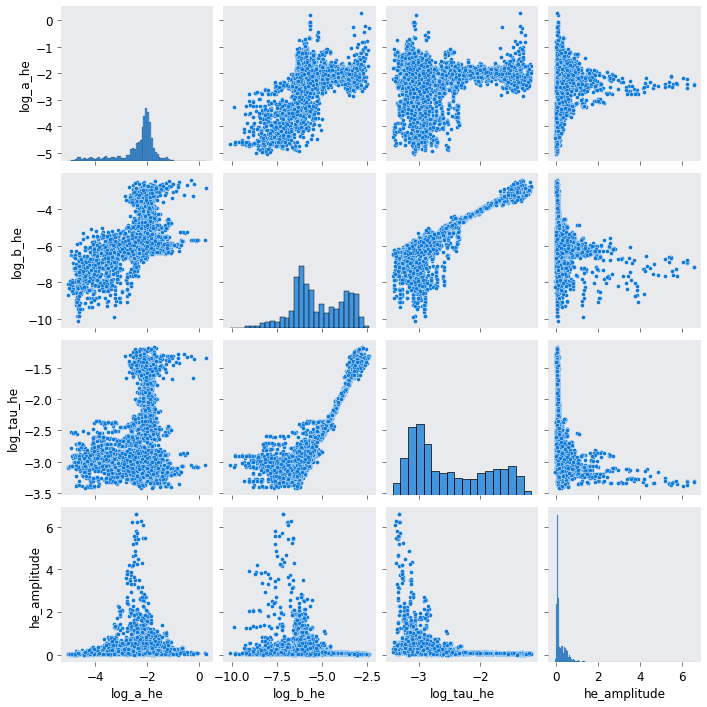

In [42]:
sns.pairplot(
    mc.sample(5000), 
    vars=[
        "log_a_he",
        "log_b_he",
        "log_tau_he",
        "he_amplitude",
    ]
);

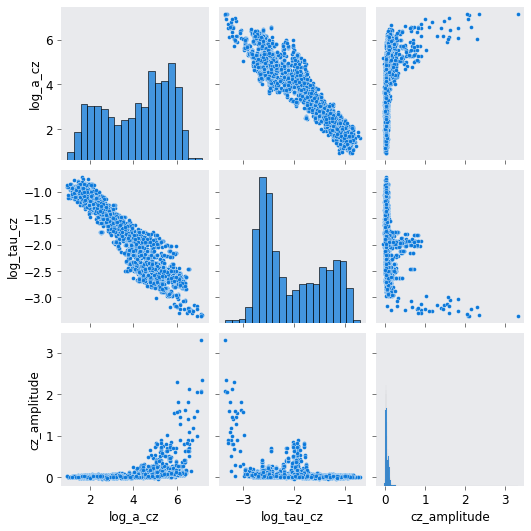

In [43]:
sns.pairplot(
    mc.sample(5000), 
    vars=[
        "log_a_cz",
        "log_tau_cz",
        "cz_amplitude",
    ]
);

In [48]:
test = pd.read_csv("data/summary.csv", index_col="index")

In [50]:
rhat_cols = [col for col in test.columns if "r_hat" in col]
test[rhat_cols]

a_cz_r_hat  a_he_r_hat  b_he_r_hat  cz_amplitude_r_hat  \
index                                                           
0        1.721891    1.756060    1.802399            1.721883   
2        1.015209    1.089761    1.045262            1.015209   
1        1.448806    1.450777    1.452428            1.448806   
4        1.000444    0.999753    1.000098            1.000448   
3        1.530362    1.572739    1.554705            1.530362   

       cz_nu_max_r_hat  delta_nu_r_hat  epsilon_r_hat  he_amplitude_r_hat  \
index                                                                       
0             1.730495        1.523895       1.513282            1.737331   
2             1.015948        1.019572       1.019791            1.029366   
1             2.052363        1.444067       1.446667            1.444163   
4             1.340089        1.001693       1.001568            1.001385   
3             2.014987        1.554870       1.559722            1.264674   

       he_nu_max_r_hat  log_a_cz_r_hat  log_a_he_r_hat  log_b_he_r_hat  \
index                                                                    
0             1.430427        1.722820        1.756060        1.802399   
2             1.036864        1.015209        1.089761        1.042117   
1             2.077989        1.448806        1.450845        1.452382   
4             1.334826        1.000442        0.999776        1.000118   
3             1.675259        1.530362        1.572739        1.554705   

       log_tau_cz_r_hat  log_tau_he_r_hat  nu_max_r_hat  phi_cz_r_hat  \
index                                                                   
0              1.942339          1.792231      1.027448      1.232093   
2              1.104347          1.149471      1.007730      1.017665   
1              1.443419          1.449223      1.647262      1.440129   
4              1.001223          1.000492      1.346285      1.001951   
3              1.571019          1.582043      4.007213      1.427471   

       phi_he_r_hat  tau_cz_r_hat  tau_he_r_hat  
index                                            
0          1.745237      1.942339      1.792231  
2          1.057127      1.104347      1.149471  
1          1.442870      1.443419      1.449223  
4          1.000606      1.001223      1.000492  
3          1.132627      1.571019      1.582043